# Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

# Import necessary libraries
In this step, we import the necessary libraries to build the model:
- `tensorflow` (for building the neural network)
- `numpy` (for numerical data handling)
- `matplotlib.pyplot` (for visualizations)

We also print the version of TensorFlow to ensure it's correctly installed.


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


# Load the Fashion MNIST dataset
Here, we load the Fashion MNIST dataset, which consists of 60,000 training images and 10,000 test images. These images are 28x28 pixel grayscale images of various clothing items.
The dataset is split into training and test sets.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Define class names
The class names represent the 10 types of clothing in the Fashion MNIST dataset. These are:
T-shirt, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Check the shape of the training images
This command prints the shape of the training images. It helps us understand the size and structure of the dataset.
:

In [4]:
train_images.shape

(60000, 28, 28)

# Check the number of training labels
This command prints the length of the training labels array, which tells us how many labels are in the dataset (it should match the number of images).


Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)

60000

# View the training labels
This displays the training labels. Each label corresponds to a class in the `class_names` list and tells us what category each image belongs to.


Each label is an integer between 0 and 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Check the shape of the test images
Similar to the training images, this command prints the shape of the test images to understand the dataset's structure.


There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

# Check the number of test labels
This prints the length of the test labels array, showing the number of test labels (it should match the number of test images).


And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

# Visualize the first image in the training dataset
This code visualizes the first image from the training dataset to get an idea of what the images look like.
We also add a color bar for reference.


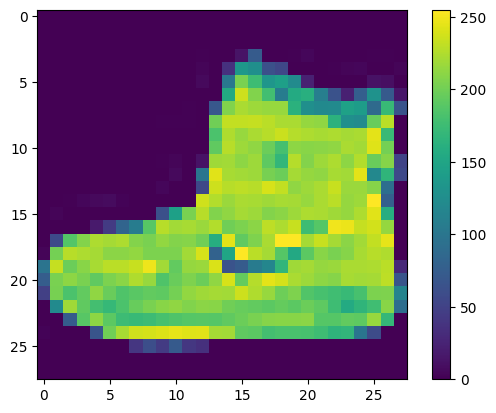

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalize image data
In this step, we normalize the image data by dividing each pixel value by 255, scaling the pixel values to a range of 0 to 1. This is done to help the neural network learn more efficiently.


Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Visualize 25 training images
Here, we visualize the first 25 images from the training set in a 5x5 grid. Each image is labeled with its corresponding class name.
This gives us a better sense of the dataset.


To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

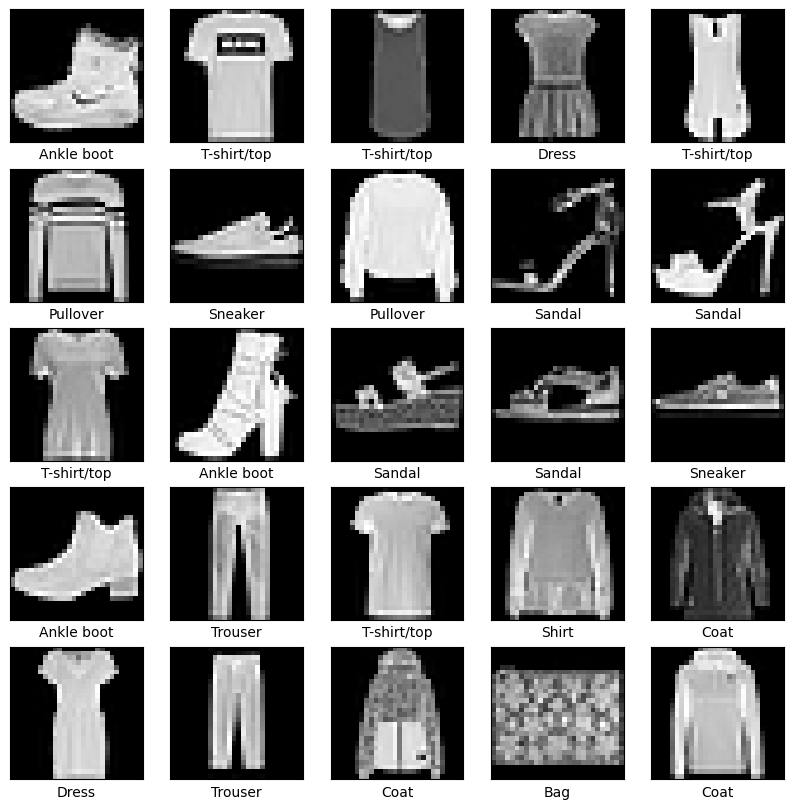

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary_r')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Define the neural network model
We define a simple neural network with three layers:
- `Flatten`: Converts the 28x28 images into a 1D array.
- `Dense`: A fully connected layer with 128 neurons and ReLU activation.
- `Dense`: The final output layer with 10 neurons (one for each class).


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the model
This step configures the model with the optimizer (`Adam`), the loss function (`SparseCategoricalCrossentropy`), and the evaluation metric (`accuracy`).
The loss function measures how well the model is performing.


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
Here, we train the model using the training data for 10 epochs. An epoch represents one complete pass through the dataset.
`verbose=1` prints the progress during training.



# Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [14]:
model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7841 - loss: 0.6249
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8612 - loss: 0.3856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8769 - loss: 0.3401
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8853 - loss: 0.3099
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8912 - loss: 0.2930
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8961 - loss: 0.2814
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9006 - loss: 0.2659
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9077 - loss: 0.2498
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9090 - loss: 0.2453
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9099 - loss: 0.2384


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91-0.95(or 91%-95%) on the training data.

# Evaluate the model on the test dataset
After training, we evaluate the model on the test data to see how well it performs on unseen data.
The `test_acc` will give us the accuracy of the model on the test dataset.


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8891 - loss: 0.3214

Test accuracy: 0.8873000144958496


# Create a probability model
In this step, we add a `Softmax` layer to the model. This converts the raw model outputs into probabilities, making it easier to interpret the predictions.


In [16]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

# Make predictions with the model
Using the trained model, we make predictions for the test dataset. The predictions are probabilities of the model's confidence in each class.


In [17]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# View the prediction for a single image
Here, the model has predicted the label for each image in the testing set.

*   List item
*   List item

Let's take a look at the first prediction:


In [18]:
predictions[1]

array([9.1590657e-05, 7.3436725e-12, 9.9929285e-01, 2.3004328e-12,
       5.3589407e-04, 3.0875347e-11, 7.9690624e-05, 1.1877113e-18,
       3.7087257e-11, 1.3267880e-11], dtype=float32)

# Find the most likely class
This line finds the class with the highest predicted probability for the second image. It gives us the index of the predicted class.


In [19]:
np.argmax(predictions[1])

np.int64(2)

# View the true label for the second image
This shows the true label for the second image in the test set. We can compare it with the model's prediction.


In [20]:
test_labels[1]

np.uint8(2)

# Dropout

In [21]:
model_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10)])

model_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_drop.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss_drop, test_acc_drop = model_drop.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc_drop)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7552 - loss: 0.6931
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8483 - loss: 0.4210
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8632 - loss: 0.3778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8666 - loss: 0.3615
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8720 - loss: 0.3461
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8768 - loss: 0.3327
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8825 - loss: 0.3213
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8861 - loss: 0.3107
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8870 - loss: 0.3060
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8922 - loss: 0.2895
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8795 - loss: 0.3379

Test accuracy: 0.8795999884605408


## Early Stopping

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_early = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])

model_early.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model_early.fit(train_images, train_labels, epochs=100, verbose=3,callbacks=[callback])

test_loss_early, test_acc_early = model_early.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc_early)
print('number of epochs',len(history.history['loss']))

# >>> # This callback will stop the training when there is no improvement in
# >>> # the loss for three consecutive epochs.
# >>> model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
# >>> model.compile(tf.keras.optimizers.SGD(), loss='mse')
# >>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
# ...                     epochs=10, batch_size=1, callbacks=[callback],
# ...                     verbose=0)
# >>> len(history.history['loss'])  # Only 4 epochs are run.
# 4

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

## L1 Regularization

In [23]:
model_l1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu',
    kernel_regularizer= tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dense(10)])

model_l1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_l1.fit(train_images, train_labels, epochs=100, verbose=3)

test_loss_l1, test_acc_l1 = model_l1.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc_l1)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

## L2 Regularization

In [24]:
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu',
    kernel_regularizer= tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(10)])

model_l2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_l2.fit(train_images, train_labels, epochs=100, verbose=1)

test_loss_l2, test_acc_l2 = model_l2.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc_l2)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7605 - loss: 1.2729
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8089 - loss: 0.6521
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8168 - loss: 0.6256
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8251 - loss: 0.6068
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8279 - loss: 0.5875
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8312 - loss: 0.5742
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8366 - loss: 0.5642
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8368 - loss: 0.5543
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8389 - loss: 0.5467
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8403 - loss: 0.5382
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8427 - loss: 0.5284
Epoch 12/100
1

Graph this to look at the full set of 10 class predictions.

In [25]:
model_l1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu',
    kernel_regularizer= tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dense(10)])

model_l1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_l1.fit(train_images, train_labels, epochs=100, verbose=3)

test_loss_l1, test_acc_l1 = model_l1.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc_l1)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

## Batch Normalization

In [26]:
model_bn=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                     tf.keras.layers.Dense(128,activation='relu'),
                     tf.keras.layers.BatchNormalization(),
                     tf.keras.layers.Dense(10)])
model_bn.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
model_bn.fit(train_images,train_labels,epochs=10,verbose=1)

test_loss_bn,test_acc_bn=model_bn.evaluate(test_images,test_labels,verbose=1)
print('\nTest accuracy:',test_acc_bn)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7990 - loss: 0.5815
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8530 - loss: 0.4073
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8651 - loss: 0.3747
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8700 - loss: 0.3552
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8797 - loss: 0.3355
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8843 - loss: 0.3209
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8863 - loss: 0.3089
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8903 - loss: 0.3046
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8906 - loss: 0.2974
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8936 - loss: 0.2912
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8763 - loss: 0.3609

Test accuracy: 0.8743000030517578


In [27]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

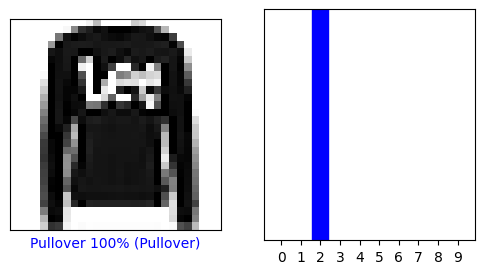

In [28]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

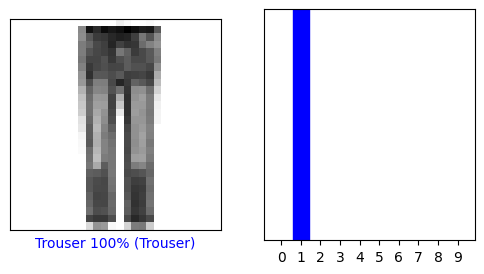

In [29]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

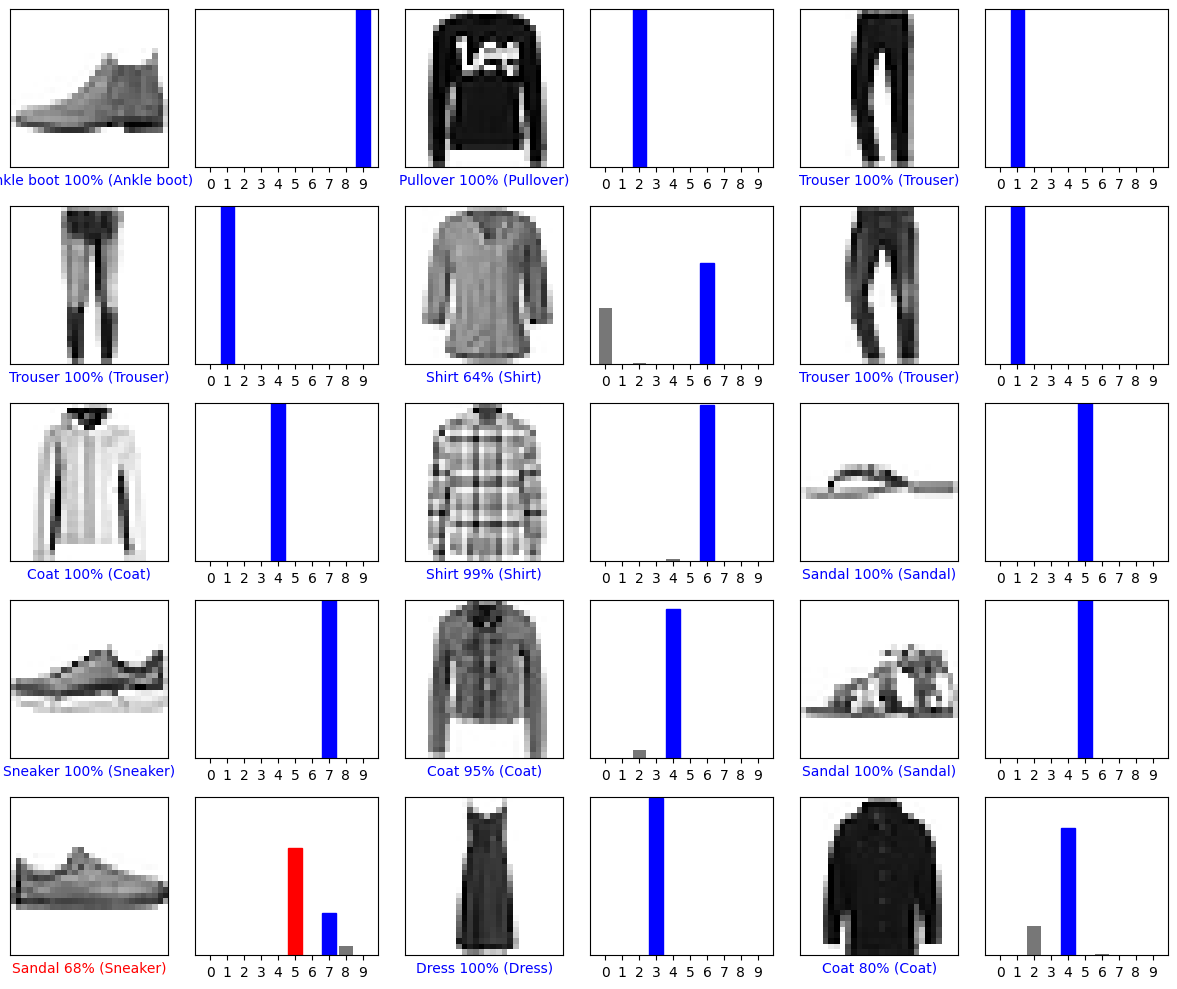

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [31]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[9.1590831e-05 7.3436725e-12 9.9929285e-01 2.3004196e-12 5.3589407e-04
  3.0875465e-11 7.9690471e-05 1.1877068e-18 3.7087257e-11 1.3267880e-11]]


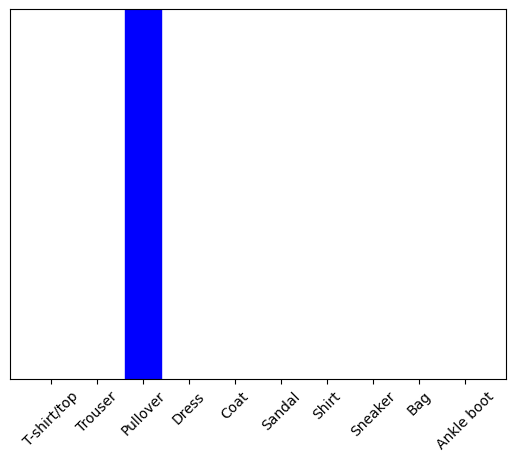

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [35]:
np.argmax(predictions_single[0])

np.int64(2)

And the model predicts a label as expected.